# Simple NN 구현

In [215]:
import numpy as np 

In [216]:
applePie = np.array([1,0,0])
bugger = np.array([0,1,0])
chicken = np.array([0,0,1])

In [217]:
sunnyDay = np.array([1,0])
rainyDay = np.array([0,1])

화창한 SunnyDay 일떄는 ApplePie 를 ,
비가 오는날엔 Bugger를 먹는다.

In [218]:
matrix = np.array([[1,0],[0,1],[0,0]])

In [219]:
np.dot(matrix,sunnyDay.T)
# SunnyDay 니깐 ApplePie를 먹는다.

array([1, 0, 0])

# simple RNN 구현하기

In [220]:
food_matrix = np.array([[[1,0,0],[0,1,0],[0,0,1]],[[0,0,1],[1,0,0],[0,1,0]]])
weather_matrix = np.array([[[1,0],[1,0],[1,0]],[[0,1],[0,1],[0,1]]])

In [221]:
def makeonehot(c) :
    # [[0,1,0],[1,2,1]] 를 [[0,0,0],[0,1,0]] 과 같이 인코딩 하려면 어떻게 해야 할까..?
    
    for i in range(len(c)) :
        if(c[i] !=2) :
            c[i] = 0
        else :
            c[i] = 1
    return c




In [222]:
h_t = applePie
x_t = rainyDay

foodV = np.dot(food_matrix,h_t)
weatherV = np.dot(weather_matrix,x_t)
food_weather = np.concatenate((foodV+weatherV))
oneHot_food2weather = makeonehot(food_weather).reshape(2,3)

In [223]:
h_t = oneHot_food2weather[0]+oneHot_food2weather[1]

In [224]:
h_t

array([0, 1, 0])

In [225]:
x_t = np.array([[1,0],[0,1],[0,1],[1,0],[0,1],[1,0]]) # 맑음, 흐림, 흐림, 맑음, 흐림, 맑음
h_t = np.array([[1,0,0]])

def simpleRNN (x_t,h_t) :
    ht = h_t
    for i in range(len(x_t)) :
        
        foodV = np.dot(food_matrix,ht[i]) #음식벡터 곱
        
        weatherV = np.dot(weather_matrix,x_t[i]) #날씨벡터 곱
        
        food_weather = np.concatenate((foodV+weatherV)) #곱한 음식과 날씨의 합
        
        oneHot_food2weather = makeonehot(food_weather).reshape(2,3) #원핫 인코딩
        
        hap = oneHot_food2weather[0]+oneHot_food2weather[1] # merge
        
        ht = np.append(ht,[hap], axis=0) # 음식리스트에 더하기
         
    return ht

print(simpleRNN(x_t,h_t))

[[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [1 0 0]
 [1 0 0]]


# VanilaRNN 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, RNN
from keras import backend as K

Using TensorFlow backend.
D:\user\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\user\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\user\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\user\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [3]:
# from https://keras.io/layers/recurrent/

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs): 
        # self : 클래스 메소드의 첫번째 인수로 self를 써 줘야만 해당 메소드를 인스턴스의 메소드로 사용할 수 있게 된다.
        
        
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)  # ???

    def build(self, input_shape): #한스탭 셀에서 이루어지는 수식을 풀어놓음 
        # 빌드타임
        
        
        # Whx 
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        # Whh
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        # bh
        self.bias = self.add_weight(
            shape=(1, self.units),
            initializer='uniform',
            name='bias')
        self.built = True

    def call(self, inputs, states):
        
        # runtime 에서 돌아가는
        
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel) + self.bias
#         output = keras.activations.sigmoid(output)
        return output, [output]

- keras의 layer는 반드시 build와 call 메소드를 구현해야 합니다.
- build 메소드 안에서 layer는 add_weight 메소드를 활용하여 이 layer의 파라미터 구성을 정의합니다.
- call 메소드는 해당 layer의 실제 로직을 구현합니다. layer의 입력과 출력, build에서 정의한 파라미터들 사이에 어떤 연산을 거치게 되는지를 정의합니다.

In [200]:
x = keras.Input((None, 5))
print(x)

Tensor("input_5:0", shape=(?, ?, 5), dtype=float32)


In [201]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6    # matlab 차트의 기본 크기를 15,6으로 지정해 줍니다.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [202]:
# csv 포맷의 데이터 경로를 지정합니다.
dataset_filepath = 'datasets/airline-passengers.csv'
# csv 파일을 읽어들여 DataFrame 객체를 생성합니다.
df = pd.read_csv(dataset_filepath)

In [203]:
train_data = [([df.iat[i+j,1] for j in range(5)], df.iat[i+5,1]) for i in range(115)]
# 그 다음값을 리스트 밖으로 뺴는 이유???
print(train_data)
test_data = [([df.iat[i+j,1] for j in range(5)], df.iat[i+5,1]) for i in range(115, 139)]
X_train = np.array([X for (X,y) in train_data])
X_test = np.array([X for (X,y) in test_data])
y_train = np.array([y for (X,y) in train_data])
y_test = np.array([y for (X,y) in test_data])

X_val = X_test
y_val = y_test

[([112, 118, 132, 129, 121], 135), ([118, 132, 129, 121, 135], 148), ([132, 129, 121, 135, 148], 148), ([129, 121, 135, 148, 148], 136), ([121, 135, 148, 148, 136], 119), ([135, 148, 148, 136, 119], 104), ([148, 148, 136, 119, 104], 118), ([148, 136, 119, 104, 118], 115), ([136, 119, 104, 118, 115], 126), ([119, 104, 118, 115, 126], 141), ([104, 118, 115, 126, 141], 135), ([118, 115, 126, 141, 135], 125), ([115, 126, 141, 135, 125], 149), ([126, 141, 135, 125, 149], 170), ([141, 135, 125, 149, 170], 170), ([135, 125, 149, 170, 170], 158), ([125, 149, 170, 170, 158], 133), ([149, 170, 170, 158, 133], 114), ([170, 170, 158, 133, 114], 140), ([170, 158, 133, 114, 140], 145), ([158, 133, 114, 140, 145], 150), ([133, 114, 140, 145, 150], 178), ([114, 140, 145, 150, 178], 163), ([140, 145, 150, 178, 163], 172), ([145, 150, 178, 163, 172], 178), ([150, 178, 163, 172, 178], 199), ([178, 163, 172, 178, 199], 199), ([163, 172, 178, 199, 199], 184), ([172, 178, 199, 199, 184], 162), ([178, 199, 1

In [204]:
# RNN의 경우 Dense와 입출력 tensor shape가 다르다.
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [205]:
# to reproduce same training result
from numpy.random import seed
seed(1) #난수 설정 0 과 1의 차이??
print(np.random.rand(5))
from tensorflow import set_random_seed #그래프 수준의 난수 설정
set_random_seed(2)

[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]


In [206]:
### 모델 만들기

cell = MinimalRNNCell(50)
# 50

# cell.build((5, 1))
rnn_layer = RNN(cell)
# rnn_layer.build((5, 1))

# define model
model = Sequential()
"""
Keras 순차모델로 시작하기 순차모델은 선형적으로 차원을 쌓은 형태
Sequential모델의 생성자로서 레이어 인스턴스 리스트를 보내서 모델을 생성할 수 있다.
"""

#model.add(Dense(100, activation='relu', input_dim=5))   
model.add(rnn_layer)  # Dense Layer 대신 RNN Layer를 사용
model.add(Dense(1))
model.build((None, 5, 1))   # model의 input shape를 지정해 주어야 summary가 가능하다.
#Sequential 
model.summary()

# 2500 + 50 + 50 Whx+ Whh + Bh

model.compile(optimizer='adam', loss='mse')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_6 (RNN)                  (None, 50)                2600      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [207]:
model.fit(X_train, y_train, epochs=1000, verbose=1, validation_data=(X_val, y_val))
"""
fit model : 트레이닝 시작
nb_epoch : 에포크(epoch) 횟수 설정
batch_size 로 배치크기(batch size) 설정
verbose는 학습 중 출력되는 문구를 설정하는 것으로, 
주피터노트북(Jupyter Notebook)을 사용할 때는 
verbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정할 수 있다.
"""

Train on 115 samples, validate on 24 samples
Epoch 1/1000
115/115 [==============================] - 0s 4ms/step - loss: 72666.4340 - val_loss: 192195.7031
Epoch 2/1000
115/115 [==============================] - 0s 87us/step - loss: 62099.7607 - val_loss: 161539.5938
Epoch 3/1000
115/115 [==============================] - 0s 78us/step - loss: 51738.6340 - val_loss: 130139.7891
Epoch 4/1000
115/115 [==============================] - 0s 95us/step - loss: 40498.1266 - val_loss: 95554.2109
Epoch 5/1000
115/115 [==============================] - 0s 95us/step - loss: 28010.5342 - val_loss: 55340.3320
Epoch 6/1000
115/115 [==============================] - 0s 104us/step - loss: 13778.3374 - val_loss: 16018.0830
Epoch 7/1000
115/115 [==============================] - 0s 69us/step - loss: 3337.8086 - val_loss: 12827.3311
Epoch 8/1000
115/115 [==============================] - 0s 83us/step - loss: 6373.3311 - val_loss: 21923.6816
Epoch 9/1000
115/115 [==============================] - 0s 78us/st

'\nfit model : 트레이닝 시작\nnb_epoch : 에포크(epoch) 횟수 설정\nbatch_size 로 배치크기(batch size) 설정\nverbose는 학습 중 출력되는 문구를 설정하는 것으로, \n주피터노트북(Jupyter Notebook)을 사용할 때는 \nverbose=2로 설정하여 진행 막대(progress bar)가 나오지 않도록 설정할 수 있다.\n'

In [213]:
# check how exactly fit train data

y_hats = []
cur_y_hat = 0
for i in range(115):
    x_input = X_train[i]
    x_input_reshape = x_input.reshape(1,5,1)
    cur_y_hat = model.predict(x_input_reshape, verbose=0)
    cur_y_hat = np.squeeze(cur_y_hat)
    print('TRAIN DATA %d : predicted=%f, ground_truth=%d' % (i, cur_y_hat, y_train[i]))
    y_hats.append(cur_y_hat)

TRAIN DATA 0 : predicted=119.331909, ground_truth=135
TRAIN DATA 1 : predicted=139.559738, ground_truth=148
TRAIN DATA 2 : predicted=152.553802, ground_truth=148
TRAIN DATA 3 : predicted=148.918427, ground_truth=136
TRAIN DATA 4 : predicted=129.928329, ground_truth=119
TRAIN DATA 5 : predicted=115.672142, ground_truth=104
TRAIN DATA 6 : predicted=107.403633, ground_truth=118
TRAIN DATA 7 : predicted=133.287720, ground_truth=115
TRAIN DATA 8 : predicted=120.007706, ground_truth=126
TRAIN DATA 9 : predicted=136.230865, ground_truth=141
TRAIN DATA 10 : predicted=141.387833, ground_truth=135
TRAIN DATA 11 : predicted=132.542892, ground_truth=125
TRAIN DATA 12 : predicted=121.800438, ground_truth=149
TRAIN DATA 13 : predicted=156.701324, ground_truth=170
TRAIN DATA 14 : predicted=175.384567, ground_truth=170
TRAIN DATA 15 : predicted=168.702560, ground_truth=158
TRAIN DATA 16 : predicted=148.056763, ground_truth=133
TRAIN DATA 17 : predicted=124.729729, ground_truth=114
TRAIN DATA 18 : pred

Text(0.5, 1.0, 'RMSE: 25.6478')

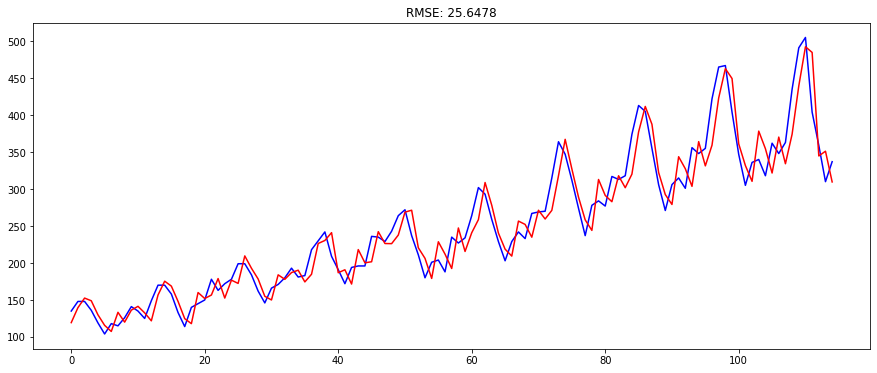

In [214]:
plt.plot(y_train,'b') 'blue 실제모델'
plt.plot(y_hats,'r') 'red 예측모델'
plt.title('RMSE: %.4f'% np.sqrt(sum((y_hats-y_train)**2)/len(y_train)))

In [156]:
# predict with trained model

y_hats = []
cur_y_hat = 0
for i in range(24):
    if i == 0:  # test data 의 맨 첫번째 row에 대해서만 X 값을 그대로 활용
        x_input = X_test[0]
    else:       # 두번째 row부터는 이전 row의 prediction을 반영하여 X를 재구성
        x_input = x_input.tolist()
        del x_input[0]
        x_input.append(cur_y_hat)
        x_input = np.array(x_input)
    x_input_reshape = x_input.reshape(1,5,1)
    cur_y_hat = model.predict(x_input_reshape, verbose=0)
    cur_y_hat = np.squeeze(cur_y_hat)
    print('TEST DATA %d : predicted=%f, ground_truth=%d' % (i, cur_y_hat, y_test[i]))
    y_hats.append(cur_y_hat)

TEST DATA 0 : predicted=393.034515, ground_truth=360
TEST DATA 1 : predicted=422.501160, ground_truth=342
TEST DATA 2 : predicted=433.603668, ground_truth=406
TEST DATA 3 : predicted=419.510956, ground_truth=396
TEST DATA 4 : predicted=395.186157, ground_truth=420
TEST DATA 5 : predicted=383.413055, ground_truth=472
TEST DATA 6 : predicted=385.133911, ground_truth=548
TEST DATA 7 : predicted=396.485138, ground_truth=559
TEST DATA 8 : predicted=409.807068, ground_truth=463
TEST DATA 9 : predicted=416.550049, ground_truth=407
TEST DATA 10 : predicted=416.017792, ground_truth=362
TEST DATA 11 : predicted=411.737091, ground_truth=405
TEST DATA 12 : predicted=407.896362, ground_truth=417
TEST DATA 13 : predicted=407.625854, ground_truth=391
TEST DATA 14 : predicted=410.823730, ground_truth=419
TEST DATA 15 : predicted=415.332184, ground_truth=461
TEST DATA 16 : predicted=419.016418, ground_truth=472
TEST DATA 17 : predicted=420.783539, ground_truth=535
TEST DATA 18 : predicted=420.998108, g

Text(0.5, 1.0, 'RMSE: 86.4654')

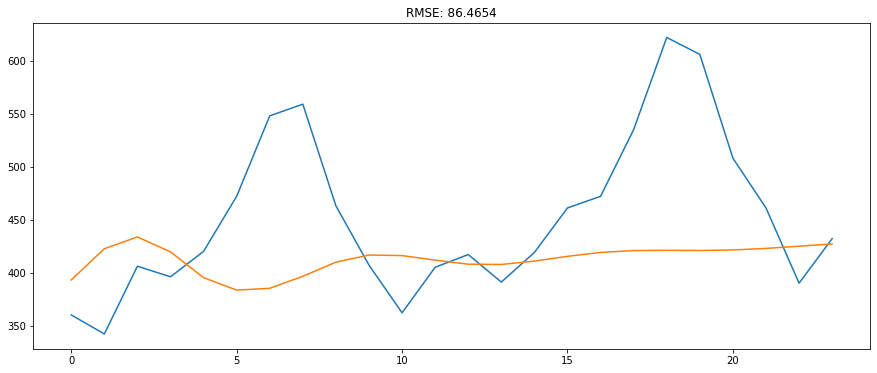

In [157]:
plt.plot(y_test) # 실제값 115~139 까지
plt.plot(y_hats) # 예측값
plt.title('RMSE: %.4f'% np.sqrt(sum((y_hats-y_test)**2)/len(y_test)))

다음장 LSTM 을 넘어가기전에 RNN 에 대해서 글로 정리해보자

RNN은 히든 노드가 방향을 가진 엣지로 연결돼 순환 구조를 이루는 (directed cycle) 인공신경망의 한 종류입니다.

음성,문자 등 순차적으로 등장하는 데이터 처리에 적합한 모델로 알려져있다

RNN 은 시퀀스 길이에 관계없이 인풋과 아우풋을 받아들일 수 있는 네트워크 구조이기 때문에 필요에 따라 다양하고 유연하게 구조를 만들 수 있다.

 - 시퀀스의 길이??  : 

현재 상태의 히든 state h_t 는 직전시점의 히든 state h_t1 을 받아 갱신된다.
현재 상태의 아우풋 Y_t 는 h_t 를 전달받아 갱신되는 구조입니다. 수식에서도 알 수 있듯 히든 state의 활성함수는 비선형 함수인 하이퍼 볼릭탄젠트를 이용한다.


  - 활성함수로 비선형 함수를 쓰는 이유 : 선형 함수인 h(x)=cx를 활성 함수로 사용한 3층 네트워크를 떠올려 보세요. 이를 식으로 나타내면 y(x)=h(h(h(x)))가 됩니다. 이 계산은 y(x)=c∗c∗c∗x처럼 세번의 곱셈을 수행하지만 실은 y(x)=ax와 똑같은 식입니다. a=c3이라고만 하면 끝이죠. 즉 히든레이어가 없는 네트워크로 표현할 수 있습니다. 그래서 층을 쌓는 혜택을 얻고 싶다면 활성함수로는 반드시 비선형함수를 사용해야 합니다.
 
순전파 (foward propagation)

다른 신경망과 마찬가지로 RNN도 정답을 필요로 합니다.  모델에 정답을 알려줘야 모델이 parameter 를 적절하게 갱신해 나갈 수 있 습니다. 
이경우엔 다음 글자가 정답입니다.

정답에 해당하는 인덱스 정보를 바ㅏㅇ으로 역전파를 수행해 parameter값들을 갱신해 나간다.

그렇다면 RNN 이 학습하는 parameter는 무엇일까?
- 인풋 x를 히든 레이어 h로 보내는 W_xh,
- 이전 히든 레이어 h에서 다음 히든레이어 h로 보내는 W_hh
- 히든레이어 h에서 아웃풋 y로 보내는 W_HY 가 바로 parameter 이다.
그리고 모든 시점의 state 에서 이 parameter는 동일하게 적용됩니다.
(shared weights)